# **Import The Useable Libraries:**


In [431]:
import numpy as np                             
import pandas as pd               
import string    
import random 
from time import time 
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
import base64
from Crypto.Util.Padding import unpad
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
from decimal import Decimal, getcontext
import scienceplots

# **Define The Global Notebook Settings:**


In [432]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
plt.rcParams.update({'font.size': 12})
plt.style.use(['science', 'no-latex'])
plt.rcParams['font.family'] = 'Times New Roman'

# **Define The Global Variables:**


In [433]:
def get_random_8chars(chars_length, n_sambles):
    random_chars = []
    for i in range(0, n_sambles, 1):
        letters = string.ascii_letters
        random_chars.append("".join(random.choice(letters)
                            for _ in range(chars_length)))
    return "".join(random_chars)

In [434]:
texts = []
sizes = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000, 20000, 30000, 40000,
         50000, 60000, 70000, 80000, 90000, 100000]

In [435]:
for size in sizes:
    texts.append([get_random_8chars(10, size)])

In [436]:
polynomial = ([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])

In [437]:
polynomial_degree = len(polynomial[0])

In [438]:
aes_key_size = 128

In [439]:
optimized_binew_encrytion_time = []

In [440]:
optimized_binew_dencrytion_time = []

In [441]:
aes_encrytion_time = []

In [442]:
aes_dencrytion_time = []

In [443]:
optimized_binew_total_time = []

In [444]:
aes_total_time = []

# **Define The Global Classes:**


In [445]:
Sbox = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
]
mix_column_matrix = [
    [0x02, 0x03, 0x01, 0x01],
    [0x01, 0x02, 0x03, 0x01],
    [0x01, 0x01, 0x02, 0x03],
    [0x03, 0x01, 0x01, 0x02]
]
Rcon = [
    0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36,
    0x6C, 0xD8, 0xAB, 0x4D, 0x9A, 0x2F, 0x5E, 0xBC, 0x63, 0xC6
]


def sub_bytes(state):
    return [Sbox[b] for b in state]


def shift_rows(state):
    return [
        state[0], state[5], state[10], state[15],
        state[4], state[9], state[14], state[3],
        state[8], state[13], state[2], state[7],
        state[12], state[1], state[6], state[11]
    ]


def mix_columns(state):
    result = [0] * 16
    for i in range(4):
        for j in range(4):
            result[i + j * 4] = (
                mix_column_matrix[0][i] * state[j * 4] +
                mix_column_matrix[1][i] * state[1 + j * 4] +
                mix_column_matrix[2][i] * state[2 + j * 4] +
                mix_column_matrix[3][i] * state[3 + j * 4]
            ) % 256
    return result


def add_round_key(state, round_key):
    return [(b1 ^ b2) for b1, b2 in zip(state, round_key)]


def key_expansion(key):
    key_schedule = [b for b in key]
    for i in range(16, 176, 4):
        temp = key_schedule[i-4:i]
        if i % 16 == 0:
            temp = sub_bytes(rot_word(temp)) + [Rcon[i//16 - 1], 0, 0, 0]
        key_schedule.extend(
            [a ^ b for a, b in zip(temp, key_schedule[i-16:i])])
    return key_schedule


def rot_word(word):
    return word[1:] + [word[0]]


def sub_word(word):
    return [Sbox[b] for b in word]


def aes_encrypt_block(block, key):
    round_keys = key_expansion(key)
    state = add_round_key(block, round_keys[:16])
    for round_num in range(1, 10):
        state = sub_bytes(state)
        state = shift_rows(state)
        state = mix_columns(state)
        round_key = round_keys[round_num * 16:(round_num + 1) * 16]
        state = add_round_key(state, round_key)
    state = sub_bytes(state)
    state = shift_rows(state)
    state = add_round_key(state, round_keys[160:])
    return state


def aes_encrypt(plaintext, key):
    if len(plaintext) % 16 != 0:
        raise ValueError(
            "Input plaintext must be a multiple of 16 bytes (128 bits)")
    key_exp = key_expansion(key)
    ciphertext = b""
    for i in range(0, len(plaintext), 16):
        block = bytes(aes_encrypt_block(plaintext[i:i+16], key_exp))
        ciphertext += block
    return ciphertext


def inv_sub_bytes(state):
    return [Sbox.index(b) for b in state]


def inv_shift_rows(state):
    return [
        state[0], state[13], state[10], state[7],
        state[4], state[1], state[14], state[11],
        state[8], state[5], state[2], state[15],
        state[12], state[9], state[6], state[3]
    ]


def inv_mix_columns(state):
    return mix_columns(state)


def aes_decrypt_block(block, key):
    round_keys = key_expansion(key)
    state = add_round_key(block, round_keys[10 * 16:])
    state = inv_shift_rows(state)
    state = inv_sub_bytes(state)
    for round_num in range(9, 0, -1):
        state = add_round_key(
            state, round_keys[round_num * 16:(round_num + 1) * 16])
        state = inv_mix_columns(state)
        state = inv_shift_rows(state)
        state = inv_sub_bytes(state)
    state = add_round_key(state, round_keys[:16])
    return state


def aes_decrypt(ciphertext, key):
    if len(ciphertext) % 16 != 0:
        raise ValueError(
            "Input ciphertext must be a multiple of 16 bytes (128 bits)")
    key_exp = key_expansion(key)
    decrypted_text = b""
    for i in range(0, len(ciphertext), 16):
        block = bytes(aes_decrypt_block(ciphertext[i:i+16], key_exp))
        decrypted_text += block
    return decrypted_text


def pkcs7_pad(data):
    pad_len = 16 - (len(data) % 16)
    return data + bytes([pad_len] * pad_len)


def pkcs7_unpad(data):
    pad_len = data[-1]
    return data[:-pad_len]

In [446]:
byte_representation = "          ".encode('utf-8')
integer_representation = int.from_bytes(
    byte_representation, byteorder='big')
integer_representation

151708338147718170943520

In [447]:
class BiNew(object):
    def __init__(self, text, x, y):
        if type(text) != str or len(x) != len(y):
            raise ValueError("Invalid parameters passed")
        self.text = text
        self.len_text = len(text)
        self.x = [Decimal(i) for i in x]
        self.y = [Decimal(i) for i in y]
        self.coefs = None
        self.maximium_8utf_chars = Decimal(597351581456640298090110)
        self.minimum_8utf_chars = Decimal(151708338147718170943520)
        self.len_x = len(x)

    def set_text(self, text):
        if type(text) != str:
            raise ValueError("Invalid text type passed")
        self.text = text

    def set_x_y(self, x, y):
        if len(x) != len(y):
            raise ValueError("Invalid x, y points size passed")
        self.x = [Decimal(i) for i in x]
        self.y = [Decimal(i) for i in y]
        self.len_x = len(x)
        self.coefs = None

    def encode_and_get_int_values(self, chunk):
        byte_representation = chunk.encode('utf-8')
        integer_representation = int.from_bytes(
            byte_representation, byteorder='big')
        return integer_representation

    def get_normalized_value(self, integer_value):
        decimal_value = Decimal(integer_value)
        normalized_value = (decimal_value - self.minimum_8utf_chars) / \
            (self.maximium_8utf_chars - self.minimum_8utf_chars)
        return normalized_value

    def get_inverse_normalized_value(self, normalized_value):
        integer_value = (normalized_value *
                         (self.maximium_8utf_chars - self.minimum_8utf_chars)) + self.minimum_8utf_chars
        return integer_value

    def get_normalized_values(self):
        normalized_values = []
        chunks = self.len_text // 10
        beg, end = 0, 0
        if chunks:
            end = 10
            for i in range(0, chunks, 1):
                chunk = self.text[beg: end]
                normalized_values.append(
                    self.get_normalized_value(self.encode_and_get_int_values(chunk)))
                beg = end
                end = beg + 10
        if (self.len_text / 10) % 1 != 0:
            chunk = self.text[end:]
            normalized_values.append(
                self.get_normalized_value(self.encode_and_get_int_values(chunk)))
        return normalized_values

    def get_interger_values(self, normalized_values):
        interger_values = []
        for normalized_value in normalized_values:
            interger_values.append(
                self.get_inverse_normalized_value(normalized_value))
        return interger_values

    def decode_and_get_strings(self, int_values):
        strings = []
        for int_value in int_values:
            int_value = np.ceil(int_value)
            byte_representation = int_value.to_bytes(
                (int_value.bit_length() + 7) // 8, byteorder='big')
            text = byte_representation.decode('utf-8')
            strings.append(text)
        return "".join(strings)

    def decode_and_get_string(self, int_value):
        int_value = np.ceil(int_value)
        byte_representation = int_value.to_bytes(
            (int_value.bit_length() + 7) // 8, byteorder='big')
        return (byte_representation.decode('utf-8'))

    def newton_forward_coefficients(self):
        n = len(self.x)
        coefficients = np.zeros(n, dtype=Decimal)
        for i in range(n):
            coefficients[i] = Decimal(self.y[i])
        for j in range(1, n):
            for i in range(n - 1, j - 1, -1):
                coefficients[i] = (coefficients[i] - coefficients[i - 1]) / \
                    (self.x[i] - self.x[i - j])
        self.coefs = coefficients

    def evaluate_interpolated_value(self, target, normalized_value=Decimal(0)):
        n = self.len_x
        result = Decimal(self.coefs[-1])
        for i in range(n - 2, -1, -1):
            result = Decimal(result) * \
                (Decimal(target) - Decimal(self.x[i])) + Decimal(self.coefs[i])
        return result - normalized_value

    def evaluate_derivative(self, x, normalized_value):
        n = len(self.coefs) - 1
        result = Decimal(n) * (self.coefs[-1] - normalized_value)
        for i in range(n - 1, 0, -1):
            result = result * \
                (Decimal(x) - Decimal(self.x[i])) + Decimal(i) * self.coefs[i]
        return result

    def find_roots_secant(self, x0, x1, normalized_value, tol=Decimal(10 ** -17), max_iter=16):
        x_prev = Decimal(x0)
        x_curr = Decimal(x1)
        for i in range(max_iter):
            fx_prev = self.evaluate_interpolated_value(
                x_prev, normalized_value)
            fx_curr = self.evaluate_interpolated_value(
                x_curr, normalized_value)
            if fx_curr - fx_prev == 0:
                raise ValueError(
                    "Secant method cannot converge. Division by zero.")
            x_next = x_curr - fx_curr * (x_curr - x_prev) / (fx_curr - fx_prev)
            x_prev = x_curr
            x_curr = x_next
            if abs(fx_curr) < tol:
                return x_curr
        return x_curr

    def bisection_method(self, a, b, normalized_value, tol=Decimal(10 ** -38)):
        if self.evaluate_interpolated_value(a, normalized_value) * self.evaluate_interpolated_value(b, normalized_value) > 0:
            raise ValueError(
                "The function values at the endpoints must have different signs.")
        for i in range(40):
            midpoint = (a + b) / Decimal(2)
            if self.evaluate_interpolated_value(midpoint, normalized_value) == Decimal(0):
                return midpoint
            elif self.evaluate_interpolated_value(midpoint, normalized_value) * self.evaluate_interpolated_value(a, normalized_value) < 0:
                b = midpoint
            else:
                a = midpoint
        return midpoint

    def find_roots_newton(self, initial_guess, normalized_value, tol=Decimal(10 ** -17), max_iter=70):
        x_guess = Decimal(initial_guess)
        for _ in range(max_iter):
            fx = self.evaluate_interpolated_value(x_guess, normalized_value)
            dfx = self.evaluate_derivative(x_guess, normalized_value)
            if dfx == Decimal(0):
                raise ValueError(
                    "Derivative is zero. Newton-Raphson method cannot converge.")
            x_guess -= fx / dfx
            if abs(fx) < tol:
                return x_guess
        return x_guess

    def find_roots_false_position(self, a, b, normalized_value, tol=Decimal(10 ** -17), max_iter=21):
        if self.evaluate_interpolated_value(a, normalized_value) * self.evaluate_interpolated_value(b, normalized_value) > 0:
            raise ValueError(
                "The function values at the endpoints must have different signs.")
        for i in range(max_iter):
            fa = self.evaluate_interpolated_value(a, normalized_value)
            fb = self.evaluate_interpolated_value(b, normalized_value)
            if fa == Decimal(0):
                return a
            if fb == Decimal(0):
                return b
            x_next = (a * fb - b * fa) / (fb - fa)
            fx_next = self.evaluate_interpolated_value(
                x_next, normalized_value)
            if abs(fx_next) < tol:
                return x_next
            if fx_next * fa < 0:
                b = x_next
            else:
                a = x_next
        return (a + b) / Decimal(2)

    def encryption(self):
        cipher_text = []
        self.newton_forward_coefficients()
        normalized_values = self.get_normalized_values()
        for normalized_value in normalized_values:
            # cipher_text.append(self.bisection_method(self.x[0], self.x[-1] , normalized_value)) # Biesction
            # cipher_text.append(self.find_roots_newton(self.x[0] , normalized_value)) # Newton
            cipher_text.append(self.find_roots_secant(
                self.x[0], self.x[-1], normalized_value))  # Secant
            # cipher_text.append(self.find_roots_false_position(self.x[0], self.x[-1] , normalized_value)) # False Position
        return cipher_text

    def dencryption(self, cipher_text):
        text = []
        for root in cipher_text:
            norm = self.evaluate_interpolated_value(root)
            inverse = self.get_inverse_normalized_value(norm)
            # text.append(self.decode_and_get_string(Decimal(round(inverse))))  # Biesction
            # text.append(self.decode_and_get_string(Decimal(int(inverse) + 1)))  # Newton
            text.append(self.decode_and_get_string(
                Decimal(round(inverse))))  # Secant
            # text.append(self.decode_and_get_string(Decimal(round(inverse))))  # False Position
        return "".join(text)

# **Get The Encryption & Dencrytion & Total Times For Bisection , Secant Hyprid With Differrent Polynomials Degree 2 : 6**


In [448]:
polynomials = [
    ([2, 2.5, 3], [2, -2, -3]),
    ([3, 3.5, 4, 4.5], [3, 3, -4, -4.5]),
    ([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6]),
    ([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5]),
    ([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9]),
]

In [449]:
Degrees = []
for poly in polynomials:
    Degrees.append(len(poly[0]) - 1)

In [450]:
texts_diff = []
sizes_diff = [500, 1000, 1500, 2000, 2500]
for size in sizes_diff:
    texts_diff.append([get_random_8chars(10, size)])

In [451]:
bisection_different_sizes_degrees_encrytpion = []
bisection_different_sizes_degrees_dencryption = []
bisection_different_sizes_degrees_total = []

In [452]:
fposition_different_sizes_degrees_encrytpion = []
fposition_different_sizes_degrees_dencryption = []
fposition_different_sizes_degrees_total = []

In [453]:
secant_different_sizes_degrees_encrytpion = []
secant_different_sizes_degrees_dencryption = []
secant_different_sizes_degrees_total = []

### **Get Encryption , Dencryption , Total Times When Using Bisction:**


In [454]:
for text, poly in zip(texts_diff, polynomials):
    print(poly)
    obj = BiNew(text[0], poly[0], poly[1])
    binew_en_beg = time()
    ciper_text = obj.encryption()
    binew_en_end = time()
    en_time = binew_en_end - binew_en_beg
    bisection_different_sizes_degrees_encrytpion.append(en_time)

    binew_den_beg = time()
    text_dencryption = obj.dencryption(ciper_text)
    binew_den_end = time()
    den_time = binew_den_end - binew_den_beg
    bisection_different_sizes_degrees_dencryption.append(den_time)

    bisection_different_sizes_degrees_total.append(en_time + den_time)
    print(text_dencryption == text[0])

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Get Encryption , Dencryption , Total Times When Using False Position:**


In [455]:
for text, poly in zip(texts_diff, polynomials):
    print(poly)
    obj = BiNew(text[0], poly[0], poly[1])
    binew_en_beg = time()
    ciper_text = obj.encryption()
    binew_en_end = time()
    en_time = binew_en_end - binew_en_beg
    fposition_different_sizes_degrees_encrytpion.append(en_time)

    binew_den_beg = time()
    text_dencryption = obj.dencryption(ciper_text)
    binew_den_end = time()
    den_time = binew_den_end - binew_den_beg
    fposition_different_sizes_degrees_dencryption.append(den_time)

    fposition_different_sizes_degrees_total.append(en_time + den_time)
    print(text_dencryption == text[0])

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Get Encryption , Dencryption , Total Times When Using Secant:**


In [456]:
for text, poly in zip(texts_diff, polynomials):
    print(poly)
    obj = BiNew(text[0], poly[0], poly[1])
    binew_en_beg = time()
    ciper_text = obj.encryption()
    binew_en_end = time()
    en_time = binew_en_end - binew_en_beg
    secant_different_sizes_degrees_encrytpion.append(en_time)

    binew_den_beg = time()
    text_dencryption = obj.dencryption(ciper_text)
    binew_den_end = time()
    den_time = binew_den_end - binew_den_beg
    secant_different_sizes_degrees_dencryption.append(den_time)

    secant_different_sizes_degrees_total.append(en_time + den_time)
    print(text_dencryption == text[0])

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Record The Results Of Encrytion , Dencryption Total Times When Using Bisection , Secant , False Position For Differrent Sizes , Poly Degrees**


In [457]:
bisection_secant_differrent_sizes_degress = pd.DataFrame()

In [458]:
encrytion_times = []
for bisection_en_time, secant_en_time, fpo_en_time in zip(bisection_different_sizes_degrees_encrytpion,
                                                          secant_different_sizes_degrees_encrytpion,
                                                          fposition_different_sizes_degrees_encrytpion):
    encrytion_times.extend([bisection_en_time, fpo_en_time, secant_en_time])

In [459]:
dencrytion_times = []
for bisection_den_time, secant_den_time, fpo_den_time in zip(bisection_different_sizes_degrees_dencryption,
                                                             secant_different_sizes_degrees_dencryption,
                                                             fposition_different_sizes_degrees_dencryption):
    dencrytion_times.extend(
        [bisection_den_time, fpo_den_time, secant_den_time])

In [460]:
total_times = []
names = []
for bisection_total_time, secant_total_time, fpo_total_time in zip(bisection_different_sizes_degrees_total,
                                                                   secant_different_sizes_degrees_total,
                                                                   fposition_different_sizes_degrees_total):
    total_times.extend(
        [bisection_total_time, fpo_total_time, secant_total_time])
    names.extend(["Biscetion", "False Position", "Secant"])

In [461]:
Polys_Degrees = []
for degree in Degrees:
    Polys_Degrees.extend([degree, degree, degree])

In [462]:
file_sizes = []
for size in sizes_diff:
    file_sizes.extend([size, size, size])

In [463]:
bisection_secant_differrent_sizes_degress["Root Finding Algorithm"] = names
bisection_secant_differrent_sizes_degress["File Size In Bytes"] = [
    4 * i for i in file_sizes]
bisection_secant_differrent_sizes_degress["Polynomial Degree"] = Polys_Degrees
bisection_secant_differrent_sizes_degress["Encrytion Time"] = encrytion_times
bisection_secant_differrent_sizes_degress["Decrytion Time"] = dencrytion_times
bisection_secant_differrent_sizes_degress["Total Time"] = total_times

In [464]:
bisection_secant_differrent_sizes_degress

,Root Finding Algorithm,File Size In Bytes,Polynomial Degree,Encrytion Time,Decrytion Time,Total Time
0,Biscetion,2000,2,0.058188,0.008610,0.066797
1,False Position,2000,2,0.052344,0.007844,0.060189
2,Secant,2000,2,0.055259,0.007684,0.062943
3,Biscetion,4000,3,0.111369,0.020011,0.131380
4,False Position,4000,3,0.111854,0.018058,0.129912
5,Secant,4000,3,0.114127,0.017221,0.131349
6,Biscetion,6000,4,0.344610,0.027992,0.372602
7,False Position,6000,4,0.214728,0.028559,0.243287
8,Secant,6000,4,0.213452,0.029612,0.243064
9,Biscetion,8000,5,0.308265,0.039541,0.347807


In [465]:
bisection_secant_differrent_sizes_degress.to_csv(
    r"./RootFindingAlgorithmsAnalysis/biscetion_falseposition_secant_differrenttimes.csv")

### **Plot The Results:**


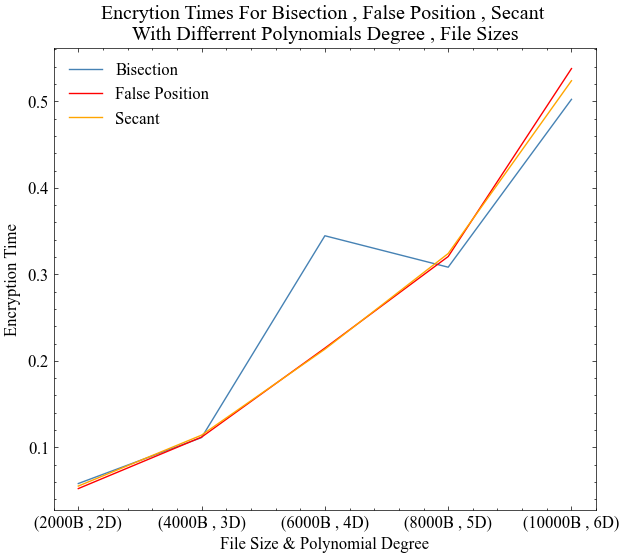

In [466]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, bisection_different_sizes_degrees_encrytpion,
         color="steelblue", label="Bisection")
plt.plot(sizes_diff, fposition_different_sizes_degrees_encrytpion,
         color="red", label="False Position")
plt.plot(sizes_diff, secant_different_sizes_degrees_encrytpion,
         color="orange", label="Secant")
plt.xticks(sizes_diff, [
           f"({4 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Encryption Time")
plt.title("Encrytion Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes")
plt.legend()
plt.savefig(
    r"./RootFindingAlgorithmsAnalysis/biscetion_falseposition_secant_entimes.svg", format="svg")
plt.show()

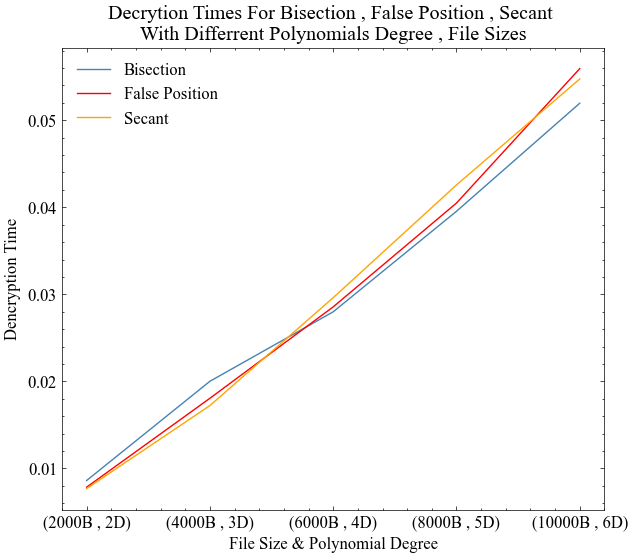

In [467]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, bisection_different_sizes_degrees_dencryption,
         color="steelblue", label="Bisection")
plt.plot(sizes_diff, fposition_different_sizes_degrees_dencryption,
         color="red", label="False Position")
plt.plot(sizes_diff, secant_different_sizes_degrees_dencryption,
         color="orange", label="Secant")
plt.xticks(sizes_diff, [
           f"({4 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Dencryption Time")
plt.title("Decrytion Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes")
plt.legend()
plt.savefig(
    r"./RootFindingAlgorithmsAnalysis/biscetion_falseposition_secant_dentimes.svg", format="svg")
plt.show()

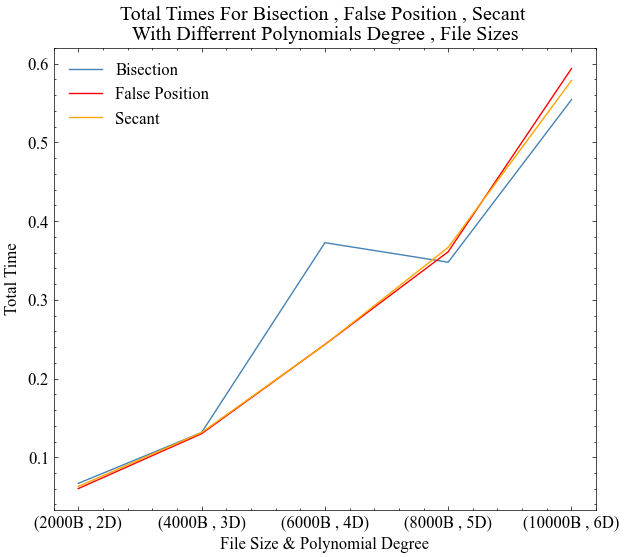

In [468]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, bisection_different_sizes_degrees_total,
         color="steelblue", label="Bisection")
plt.plot(sizes_diff, fposition_different_sizes_degrees_total,
         color="red", label="False Position")
plt.plot(sizes_diff, secant_different_sizes_degrees_total,
         color="orange", label="Secant")
plt.xticks(sizes_diff, [
           f"({4 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Total Time")
plt.title("Total Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes")
plt.legend()
plt.savefig(
    r"./RootFindingAlgorithmsAnalysis/biscetion_falseposition_secant_totaltimes.svg", format="svg")
plt.show()

# **Try Optimized Binew , AES With Different Degrees Untill Degree 6 For Differrent Sizes:**


In [469]:
optimizedBinew_different_sizes_degrees_encrytpion = []
optimizedBinew_sizes_degrees_dencryption = []
optimizedBinewt_sizes_degrees_total = []

In [470]:
aes_encrytpion = []
aes_dencryption = []
aes_total = []

In [471]:
for text, poly in zip(texts_diff, polynomials):
    print(poly)
    obj = BiNew(text[0], poly[0], poly[1])
    binew_en_beg = time()
    ciper_text = obj.encryption()
    binew_en_end = time()
    en_time = binew_en_end - binew_en_beg
    optimizedBinew_different_sizes_degrees_encrytpion.append(en_time)

    binew_den_beg = time()
    text_dencryption = obj.dencryption(ciper_text)
    binew_den_end = time()
    den_time = binew_den_end - binew_den_beg
    optimizedBinew_sizes_degrees_dencryption.append(den_time)

    optimizedBinewt_sizes_degrees_total.append(en_time + den_time)
    print(text_dencryption == text[0])

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


In [472]:
for text in texts_diff:
    aes_en_beg = time()
    key = b'sfisdfjslkdjfs'
    text_ = text[0].encode('utf-8')
    padded_text = pkcs7_pad(text_)
    ciphertext = aes_encrypt(padded_text, key)
    aes_en_end = time()
    en_time = aes_en_end - aes_en_beg
    aes_encrytpion.append(en_time)

    aes_den_beg = time()
    decrypted_text = pkcs7_unpad(aes_decrypt(ciphertext, key))
    aes_den_end = time()
    den_time = aes_den_end - aes_den_beg
    aes_dencryption.append(den_time)

    aes_total.append(en_time + den_time)

### **Record The Results:**


In [473]:
AES_OptimizedBinew_Differrent_Poly_Sizes = pd.DataFrame()

In [474]:
encrytion_times = []
for aes_en_time, optimizedBinew_en_time in zip(aes_encrytpion,
                                               optimizedBinew_different_sizes_degrees_encrytpion):
    encrytion_times.append(aes_en_time)
    encrytion_times.append(optimizedBinew_en_time)

In [475]:
dencrytion_times = []
for aes_den_time, optimizedBinew_den_time in zip(aes_dencryption,
                                                 optimizedBinew_sizes_degrees_dencryption):
    dencrytion_times.append(aes_den_time)
    dencrytion_times.append(optimizedBinew_den_time)

In [476]:
total_times = []
for aes_total_time, optimizedBinew_total_time in zip(aes_total,
                                                     optimizedBinewt_sizes_degrees_total):
    total_times.append(aes_total_time)
    total_times.append(optimizedBinew_total_time)

In [477]:
names = []
key_size_ploy_degree = []
for degree in Degrees:
    names.extend(["AES", "IBGA"])
    key_size_ploy_degree.extend([128, f"{degree}D"])

In [478]:
file_sizes = []
for size in sizes_diff:
    file_sizes.extend([size, size])

In [479]:
AES_OptimizedBinew_Differrent_Poly_Sizes["Encrytion Algorithm"] = names
AES_OptimizedBinew_Differrent_Poly_Sizes["File Size"] = [
    10 * i for i in file_sizes]
AES_OptimizedBinew_Differrent_Poly_Sizes["Key Size & Polynomial Degree"] = key_size_ploy_degree
AES_OptimizedBinew_Differrent_Poly_Sizes["Encrytion Time"] = encrytion_times
AES_OptimizedBinew_Differrent_Poly_Sizes["Dencrytion Time"] = dencrytion_times
AES_OptimizedBinew_Differrent_Poly_Sizes["Total Time"] = total_times

In [480]:
AES_OptimizedBinew_Differrent_Poly_Sizes

,Encrytion Algorithm,File Size,Key Size & Polynomial Degree,Encrytion Time,Dencrytion Time,Total Time
0,AES,5000,128,0.074823,0.200529,0.275352
1,IBGA,5000,2D,0.069499,0.014654,0.084153
2,AES,10000,128,0.133444,0.413272,0.546716
3,IBGA,10000,3D,0.101570,0.018955,0.120525
4,AES,15000,128,0.206824,0.637141,0.843966
5,IBGA,15000,4D,0.219119,0.027840,0.246959
6,AES,20000,128,0.278837,0.805029,1.083866
7,IBGA,20000,5D,0.336842,0.038343,0.375185
8,AES,25000,128,0.326442,1.045318,1.371760
9,IBGA,25000,6D,0.514963,0.054437,0.569399


In [481]:
AES_OptimizedBinew_Differrent_Poly_Sizes.to_csv(
    r"./IBGA_AES_SampleAnalysis/IBGA_AES_SampleAnalysis.csv")

### **Plot The Results:**


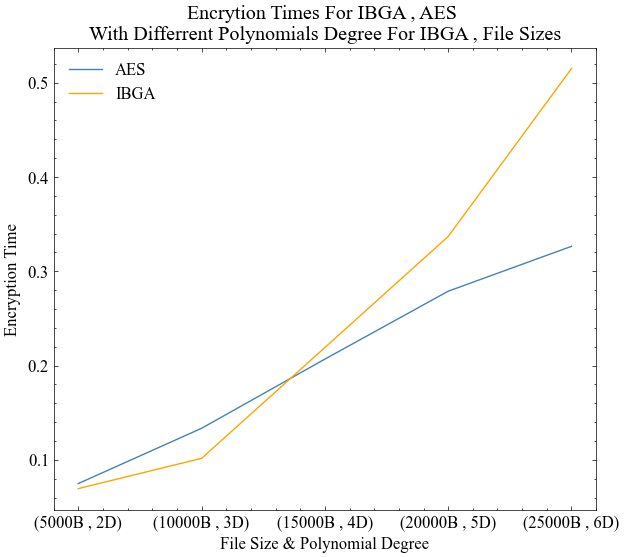

In [482]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, aes_encrytpion, color="steelblue", label="AES")
plt.plot(sizes_diff, optimizedBinew_different_sizes_degrees_encrytpion,
         color="orange", label="IBGA")
plt.xticks(sizes_diff, [
           f"({10 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Encryption Time")
plt.title("Encrytion Times For IBGA , AES \nWith Differrent Polynomials Degree For IBGA , File Sizes")
plt.legend()
plt.savefig(
    r"./IBGA_AES_SampleAnalysis/IBGA_AES_SampleAnalysis_En.svg", format="svg")
plt.show()

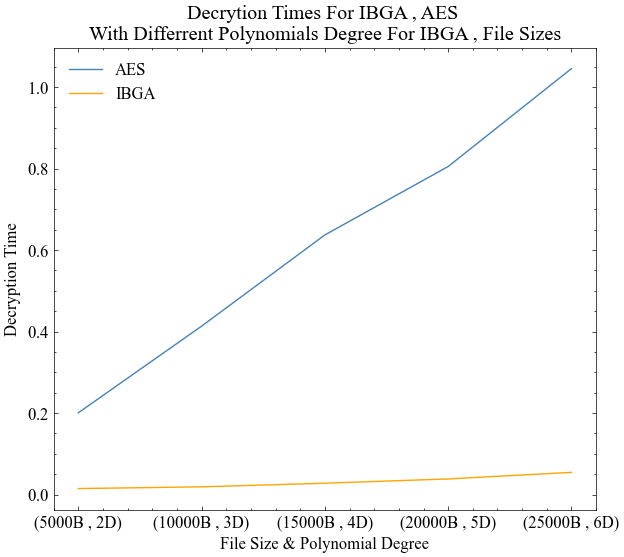

In [483]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, aes_dencryption, color="steelblue", label="AES")
plt.plot(sizes_diff, optimizedBinew_sizes_degrees_dencryption,
         color="orange", label="IBGA")
plt.xticks(sizes_diff, [
           f"({10 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Decryption Time")
plt.title("Decrytion Times For IBGA , AES \nWith Differrent Polynomials Degree For IBGA , File Sizes")
plt.legend()
plt.savefig(
    r"./IBGA_AES_SampleAnalysis/IBGA_AES_SampleAnalysis_Dn.svg", format="svg")
plt.show()

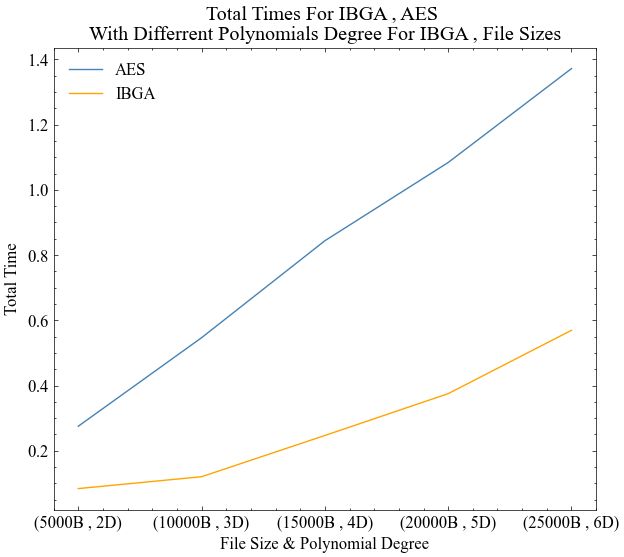

In [484]:
plt.figure(figsize=(7, 6))
plt.plot(sizes_diff, aes_total, color="steelblue", label="AES")
plt.plot(sizes_diff, optimizedBinewt_sizes_degrees_total,
         color="orange", label="IBGA")
plt.xticks(sizes_diff, [
           f"({10 * size}B , {degree}D)" for size, degree in zip(sizes_diff, Degrees)])
plt.xlabel("File Size & Polynomial Degree")
plt.ylabel("Total Time")
plt.title("Total Times For IBGA , AES \nWith Differrent Polynomials Degree For IBGA , File Sizes")
plt.legend()
plt.savefig(
    r"./IBGA_AES_SampleAnalysis/IBGA_AES_SampleAnalysis_Total.svg", format="svg")
plt.show()

# **For Optimized Binew Polynomial Degrees Can Be Within Range 1 : 6 Degree , Record The Results With Large Files Sizes When Using Middle Polynomial Degree Which Is Degree 4:**


### Using Optimized Binew:


In [485]:
for text in texts:
    print(polynomial)
    obj = BiNew(text[0], polynomial[0], polynomial[1])
    binew_en_beg = time()
    ciper_text = obj.encryption()
    binew_en_end = time()
    en_time = binew_en_end - binew_en_beg
    optimized_binew_encrytion_time.append(en_time)

    binew_den_beg = time()
    text_dencryption = obj.dencryption(ciper_text)
    binew_den_end = time()
    den_time = binew_den_end - binew_den_beg
    optimized_binew_dencrytion_time.append(den_time)

    optimized_binew_total_time.append(en_time + den_time)
    print(text_dencryption == text[0])

([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True


### **Using AES:**


In [486]:
aes_total_time = [aes_total_time]
for text in texts:
    aes_en_beg = time()
    key = b'sfisdfjslkdjfs'
    text_ = text[0].encode('utf-8')
    padded_text = pkcs7_pad(text_)
    ciphertext = aes_encrypt(padded_text, key)
    aes_en_end = time()
    en_time = aes_en_end - aes_en_beg
    aes_encrytion_time.append(en_time)

    aes_den_beg = time()
    decrypted_text = pkcs7_unpad(aes_decrypt(ciphertext, key))
    aes_den_end = time()
    den_time = aes_den_end - aes_den_beg
    aes_dencrytion_time.append(den_time)

    aes_total_time.append(en_time + den_time)

### **Record The Results:**


In [487]:
AES_OptimizedBinew_Final_Results = pd.DataFrame()

In [488]:
en_times = []
for aes_en_time, optimizedBinew_en_time in zip(aes_encrytion_time,
                                               optimized_binew_encrytion_time):
    en_times.append(aes_en_time)
    en_times.append(optimizedBinew_en_time)

In [489]:
den_times = []
for aes_den_time, optimizedBinew_den_time in zip(aes_dencrytion_time,
                                                 optimized_binew_dencrytion_time):
    den_times.append(aes_den_time)
    den_times.append(optimizedBinew_den_time)

In [490]:
total_times = []
for aes_tot_time, optimizedBinew_total_time in zip(aes_total_time,
                                                   optimized_binew_total_time):
    total_times.append(aes_tot_time)
    total_times.append(optimizedBinew_total_time)

In [491]:
names = []
key_size_ploy_degree = []
text_size = []
for size in sizes:
    text_size.extend([10 * size, 10 * size])
    names.extend(["AES", "IBGA"])
    key_size_ploy_degree.extend([128, "4D"])

In [492]:
AES_OptimizedBinew_Final_Results["Encrytion Algorithm"] = names
AES_OptimizedBinew_Final_Results["File Size"] = text_size
AES_OptimizedBinew_Final_Results["Key Size & Polynomial Degree"] = key_size_ploy_degree
AES_OptimizedBinew_Final_Results["Encrytion Time"] = en_times
AES_OptimizedBinew_Final_Results["Dencrytion Time"] = den_times
AES_OptimizedBinew_Final_Results["Total Time"] = total_times

In [493]:
AES_OptimizedBinew_Final_Results

,Encrytion Algorithm,File Size,Key Size & Polynomial Degree,Encrytion Time,Dencrytion Time,Total Time
0,AES,5000,128,0.086601,0.204965,1.371760
1,IBGA,5000,4D,0.192410,0.017286,0.209697
2,AES,10000,128,0.135270,0.401328,0.291567
3,IBGA,10000,4D,0.180208,0.018364,0.198571
4,AES,15000,128,0.191457,0.625394,0.536598
5,IBGA,15000,4D,0.268280,0.028785,0.297065
6,AES,20000,128,0.266143,0.848726,0.816851
7,IBGA,20000,4D,0.366984,0.037348,0.404332
8,AES,25000,128,0.322726,1.032069,1.114869
9,IBGA,25000,4D,0.438375,0.045289,0.483664


In [494]:
AES_OptimizedBinew_Final_Results.to_csv(
    r"./IBGA_AES_Results/IBGA_AES_Analysis.csv")

### **Plot The Results:**


In [495]:
sizes = [10 * i for i in sizes]

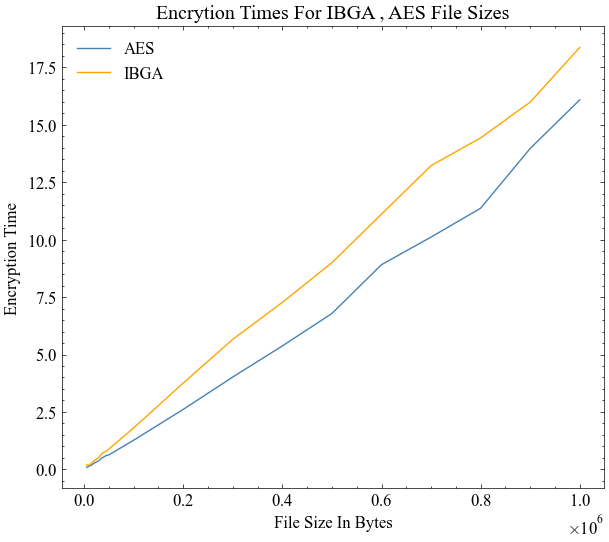

In [496]:
plt.figure(figsize=(7, 6))
plt.plot(sizes, aes_encrytion_time, color="steelblue", label="AES")
plt.plot(sizes, optimized_binew_encrytion_time, color="orange", label="IBGA")
plt.xlabel("File Size In Bytes")
plt.ylabel("Encryption Time")
plt.title("Encrytion Times For IBGA , AES File Sizes")
plt.legend()
plt.savefig(r"./IBGA_AES_Results/IBGA_AES_Analysis_En.svg", format="svg")
plt.show()

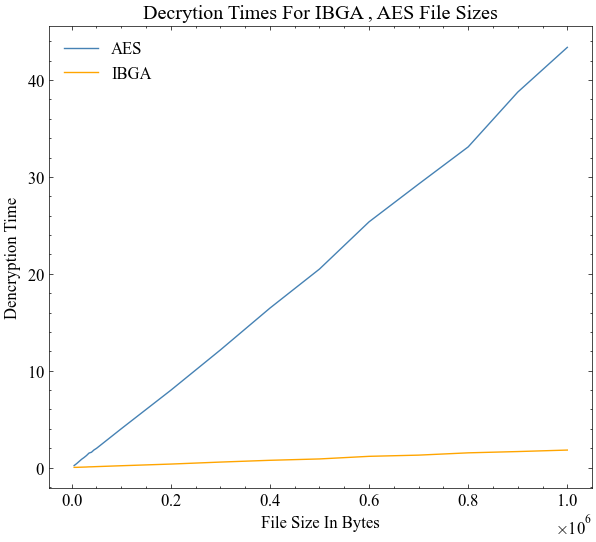

In [497]:
plt.figure(figsize=(7, 6))
plt.plot(sizes, aes_dencrytion_time, color="steelblue", label="AES")
plt.plot(sizes, optimized_binew_dencrytion_time, color="orange", label="IBGA")
plt.xlabel("File Size In Bytes")
plt.ylabel("Dencryption Time")
plt.title("Decrytion Times For IBGA , AES File Sizes")
plt.legend()
plt.savefig(r"./IBGA_AES_Results/IBGA_AES_Analysis_Dn.svg", format="svg")
plt.show()

In [498]:
len(aes_total_time)
temp_aes_total_time = aes_total_time
aes_total_time.pop(0)
print(len(temp_aes_total_time))
print(len(optimized_binew_total_time))

20
20


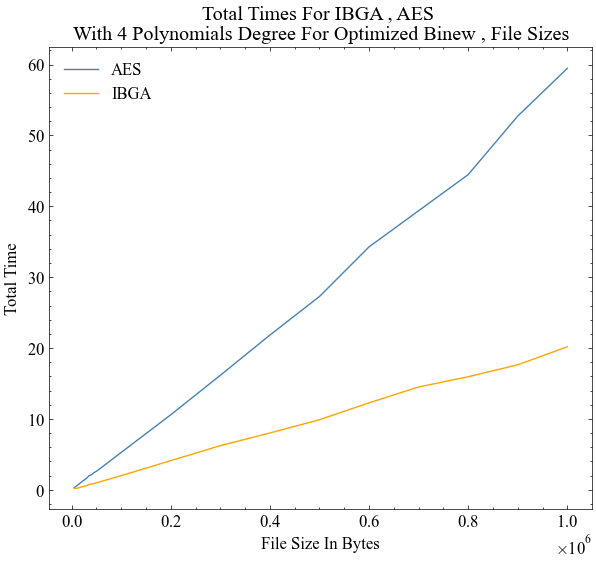

In [499]:
plt.figure(figsize=(7, 6))
plt.plot(sizes, aes_total_time, color="steelblue", label="AES")
plt.plot(sizes, optimized_binew_total_time, color="orange", label="IBGA")
plt.xlabel("File Size In Bytes")
plt.ylabel("Total Time")
plt.title("Total Times For IBGA , AES \nWith 4 Polynomials Degree For Optimized Binew , File Sizes")
plt.legend()
plt.savefig(r"./IBGA_AES_Results/IBGA_AES_Analysis_Total.svg", format="svg")
plt.show()

In [500]:
aes_total_time = temp_aes_total_time
len(aes_total_time)

20